In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isna().apply(pd.value_counts).T

,False
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


In [6]:
conda install pandas-profiling

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    confuse-1.4.0              |     pyhd3eb1b0_0          22 KB
    htmlmin-0.1.12             |     pyhd3eb1b0_1          24 KB
    imagehash-4.2.0            |     pyhd3eb1b0_0         287 KB
    missingno-0.4.2            |     pyhd3eb1b0_1          15 KB
    pandas-profiling-2.9.0     |     pyhd3eb1b0_0         168 KB
    phik-0.11.2                |     pyhd3eb1b0_0         721 KB
    tangled-up-in-unicode-0.0.7|     pyhd3eb1b0_0         699 KB
    visions-0.5.0              |     pyhd3eb1b0_0          45 KB
    ------------------------------------------------------------
                                           

In [7]:
import pandas_profiling 

In [8]:
pandas_profiling.ProfileReport(df)

In [10]:
from sklearn.cluster import KMeans

In [11]:
scale = StandardScaler()

In [13]:
df_scale = df.drop(['Id','Species'],axis=1)

In [14]:
df_scale.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
df_scale = scale.fit_transform(df_scale)

In [27]:
ml = KMeans(n_clusters=2,random_state=1)

In [28]:
#Transforming it into 3 clusters
ml.fit(df_scale)

KMeans(n_clusters=2, random_state=1)

In [29]:
pd.Series(ml.labels_).value_counts()

1    100
0     50
dtype: int64

In [30]:
df['Cluster'] = ml.labels_

In [31]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


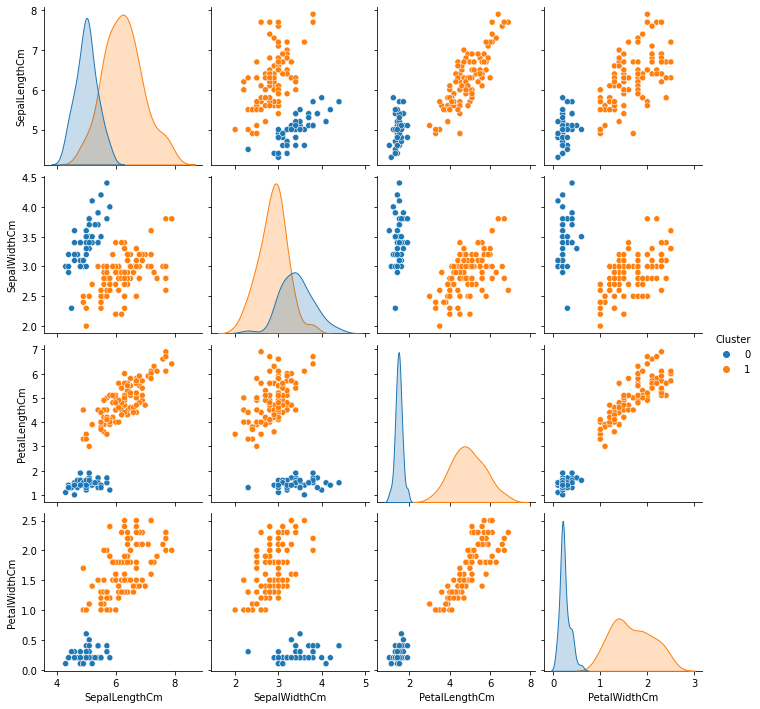

In [33]:
sns.pairplot(df,hue='Cluster')

In [25]:
wss  = []
cluster_list = list(range(1,6))
for i in cluster_list:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_scale)
    wss.append(kmeans.inertia_)

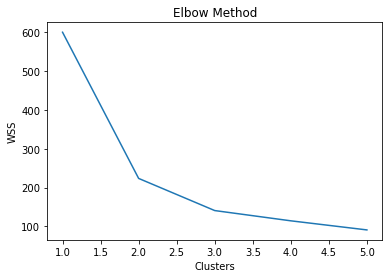

In [26]:
plt.plot(cluster_list, wss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.show()